In [1]:
import pandas as pd
import re

In [2]:
"""
Test parameters

model layer sizes: (64, 32, 32, 2)
groupdro_eta: 0.1
lr=0.001
weight_decay=0.005

batch_size = 40
proportional = True
epochs = 40
N = 120

"""

'\nTest parameters\n\nmodel layer sizes: (64, 32, 32, 2)\ngroupdro_eta: 0.1\nlr=0.001\nweight_decay=0.005\n\nbatch_size = 40\nproportional = True\nepochs = 40\nN = 120\n\n'

In [4]:
results = pd.read_csv("../results").iloc[:, 1:].transpose()
results.columns = ["ERM", "GDRO"]

In [5]:
results

,ERM,GDRO
0,"(0.8092105263157895, array([0.84375 , 0.8958...","(0.8125, array([0.86458333, 0.86458333, 0.5312..."
1,"(0.8223684210526315, array([0.83333333, 0.8541...","(0.8125, array([0.91666667, 0.88541667, 0.5625..."
2,"(0.7927631578947368, array([0.83333333, 0.8541...","(0.8125, array([0.77083333, 0.86458333, 0.7187..."
3,"(0.7927631578947368, array([0.96875, 0.875 , ...","(0.8125, array([0.84375 , 0.91666667, 0.625 ..."
4,"(0.7861842105263158, array([0.83333333, 0.9270...","(0.8092105263157895, array([0.76041667, 0.8541..."
...,...,...
115,"(0.8125, array([0.89583333, 0.875 , 0.4375...","(0.8256578947368421, array([0.84375 , 0.8645..."
116,"(0.8125, array([0.90625, 0.9375 , 0.46875, 0.6...","(0.7861842105263158, array([0.79166667, 0.7916..."
117,"(0.8092105263157895, array([0.91666667, 0.875 ...","(0.8519736842105263, array([0.94791667, 0.8020..."
118,"(0.8125, array([0.80208333, 0.875 , 0.625 ...","(0.7861842105263158, array([0.86458333, 0.7812..."


In [6]:
split = [[[float(s) for s in re.sub("\(|\[|[a-z]| |\]|\)", "", v).split(",")] for v in row] for row in results.values]
split[0][0][0]

0.8092105263157895

In [7]:
data_clean = [pd.DataFrame([[val[group] for val in row] for row in split], columns=["ERM","GDRO"]) for group in range(5)]

<AxesSubplot:title={'center':'Overall Accuracy'}>

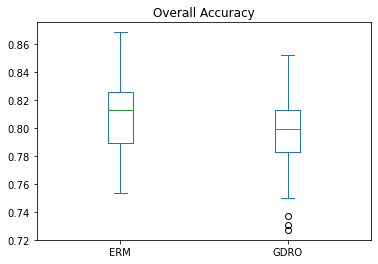

In [8]:
data_clean[0].plot(kind="box", title="Overall Accuracy")

<AxesSubplot:title={'center':'0benign'}>

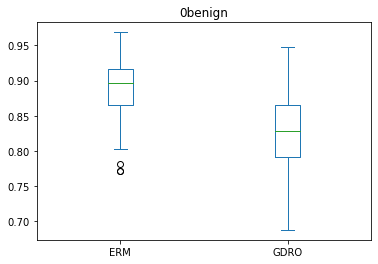

In [9]:
data_clean[1].plot(kind="box", title="0benign")

<AxesSubplot:title={'center':'1benign'}>

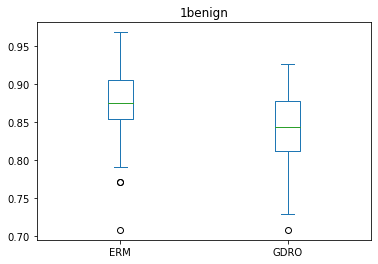

In [10]:
data_clean[2].plot(kind="box", title="1benign")

<AxesSubplot:title={'center':'0malignant'}>

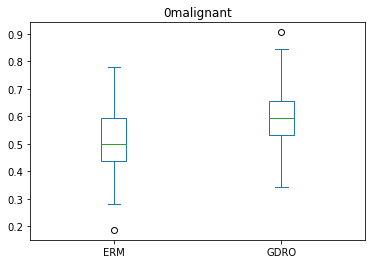

In [11]:
data_clean[3].plot(kind="box", title="0malignant")

<AxesSubplot:title={'center':'1malignant'}>

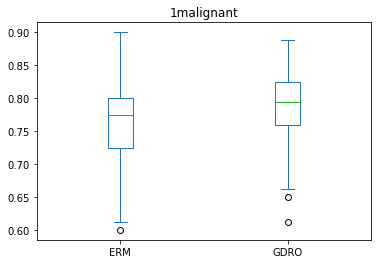

In [12]:
data_clean[4].plot(kind="box", title="1malignant")

In [13]:
from scipy.stats import ttest_ind
import statistics

group_names = ["Overall", "0benign", "1benign", "0malignant", "1malignant"]
for i in range(5):
    print(group_names[i])
    print(f"Mean ERM accuracy: {statistics.mean(data_clean[i]['ERM'])}")
    print(f"Mean GDRO accuracy: {statistics.mean(data_clean[i]['GDRO'])}")
    stat, p = ttest_ind(data_clean[i]["ERM"], data_clean[i]["GDRO"])
    if p < 0.05:
        print(f"{'ERM' if stat > 0 else 'GDRO'} higher accuracy (p = {p})")
    else:
        print(f"No statistically significant difference (p = {p})")
    print()
    

Overall
Mean ERM accuracy: 0.8102796052631579
Mean GDRO accuracy: 0.7971765350877194
ERM higher accuracy (p = 1.7304810715349727e-05)

0benign
Mean ERM accuracy: 0.8849826385833334
Mean GDRO accuracy: 0.8248263891666666
ERM higher accuracy (p = 1.9720065627529855e-19)

1benign
Mean ERM accuracy: 0.8743923608333334
Mean GDRO accuracy: 0.8430555555
ERM higher accuracy (p = 1.7024618742142993e-07)

0malignant
Mean ERM accuracy: 0.5140625
Mean GDRO accuracy: 0.6
GDRO higher accuracy (p = 7.985205400130199e-10)

1malignant
Mean ERM accuracy: 0.7621875
Mean GDRO accuracy: 0.7878125
GDRO higher accuracy (p = 0.00044082941735127323)

